<a href="https://colab.research.google.com/github/dominp97/cats_vs_dogs/blob/main/fcc_cat_dog_FAIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Rescaling, RandomFlip, RandomRotation, RandomZoom, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOS

In [108]:
# 3

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=PATH,
                                                         classes=['test'],
                                                           shuffle=False,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


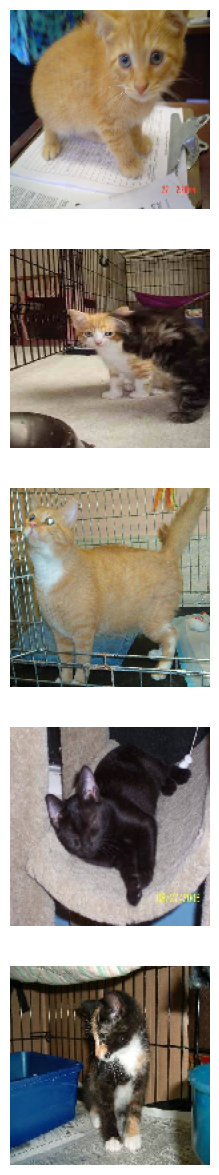

In [111]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [131]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=5.5)

#


Found 2000 images belonging to 2 classes.


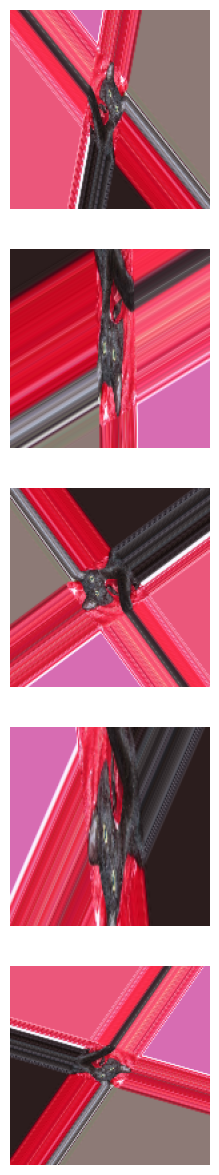

In [132]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary',
                                                           shuffle = True)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [133]:
# 7
model = Sequential()
#model.add(Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

#model.add(data_augmentation)
#model.add(Rescaling(1./255))

#model.add(Conv2D(128, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
#model.add(MaxPooling2D())

#model.add(Conv2D(2, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2,2))

model.add(Conv2D(4, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))

model.add(Conv2D(8, 3, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))

model.add(Conv2D(16, 3, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))

model.add(Conv2D(34, 3, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Conv2D(128, 3))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#model.add(Conv2D(256, 3))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2,2))

#model.add(MaxPooling2D(pool_size=(2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(
              optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )


model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_130 (Conv2D)                  │ (None, 150, 150, 4)         │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 150, 150, 4)         │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_128 (MaxPooling2D)     │ (None, 75, 75, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 75, 75, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_131 (Conv2D)                  │ (None, 75, 75, 8)           │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_96               │ (None, 75, 75, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_129 (MaxPooling2D)     │ (None, 37, 37, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 37, 37, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_132 (Conv2D)                  │ (None, 37, 37, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_97               │ (None, 37, 37, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_130 (MaxPooling2D)     │ (None, 18, 18, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 18, 18, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_133 (Conv2D)                  │ (None, 18, 18, 34)          │           4,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_98               │ (None, 18, 18, 34)          │             136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_131 (MaxPooling2D)     │ (None, 9, 9, 34)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 9, 9, 34)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_134 (Conv2D)                  │ (None, 9, 9, 64)            │          19,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_99               │ (None, 9, 9, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_132 (MaxPooling2D)     │ (None, 4, 4, 64)            │              

 Total params: 117,667 (459.64 KB)

 Trainable params: 117,159 (457.65 KB)

 Non-trainable params: 508 (1.98 KB)

In [134]:
  #inputs = tf.keras.Input(shape=(150, 150, 3))
  #x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
  #x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  #x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
  #x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  #x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
  #x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  #x = tf.keras.layers.Flatten()(x)
  #x = tf.keras.layers.Dense(num_neurons, activation='relu')(x)
  #outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
  #model = tf.keras.Model(inputs, outputs)

In [135]:
# 8


#x, steps_per_epoch, epochs, validation_data, and validation_steps


history = model.fit(
    train_data_gen, steps_per_epoch =total_train // batch_size, epochs = 20, validation_data = val_data_gen, validation_steps = total_val // batch_size
)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.4929 - loss: 0.8759 - val_accuracy: 0.4922 - val_loss: 0.6927
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.4625 - loss: 0.8067 - val_accuracy: 0.6058 - val_loss: 0.6799
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5435 - loss: 0.7124 - val_accuracy: 0.5692 - val_loss: 0.6893
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.5156 - loss: 0.6651 - val_accuracy: 0.5673 - val_loss: 0.6869
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5617 - loss: 0.6894 - val_accuracy: 0.5636 - val_loss: 0.6854
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5000 - loss: 0.6858 - val_accuracy: 0.6250 - val_loss: 0.6756
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5785 - loss: 0.6674 - val_accuracy: 0.5346 - val_loss: 0.6847
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5938 - loss: 0.6952 - val_accuracy: 0.5577 - val

ValueError: x and y must have same first dimension, but have shapes (15,) and (20,)

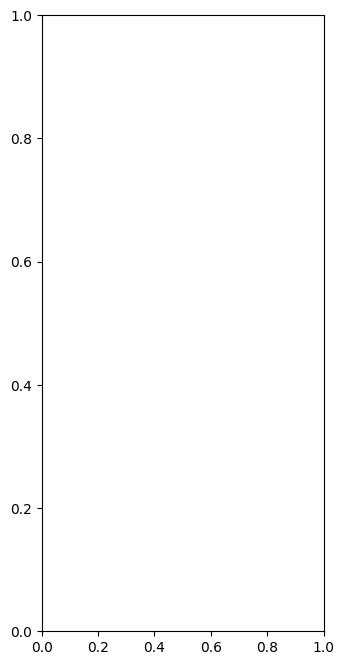

In [136]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)
probabilities = probabilities.reshape(-1)
probabilities = probabilities.tolist()

sample_testing_images, _ = next(test_data_gen)
plotImages(sample_testing_images, probabilities = probabilities)

In [130]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 62.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
